In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score

# Read multi-featured data

In [3]:
data=df=pd.read_csv('./MultipleLR.csv.csv',header=None)
data.head()

0   1    2    3
0  73  80   75  152
1  93  88   93  185
2  89  91   90  180
3  96  98  100  196
4  73  66   70  142

# Extract the  features


In [265]:
A=np.array(data.loc[:,0:2]) #take the 3 feature vectors

bias=np.ones((A.shape[0],1))
A=np.append(bias,A,axis=1) #Add the bias to A
print('x-shape',A.shape)

theta_vector=np.full((A.shape[1],1),0.001) #initialize weights with small no
print('theta-shape',theta_vector.shape)

ylabel=np.array(data[3]).reshape(-1,1) #take the label vector
print('y-shape',ylabel.shape)

x-shape (25, 4)
theta-shape (4, 1)
y-shape (25, 1)


# Plot original data

Text(0.5, 1.0, 'Third feature plot')

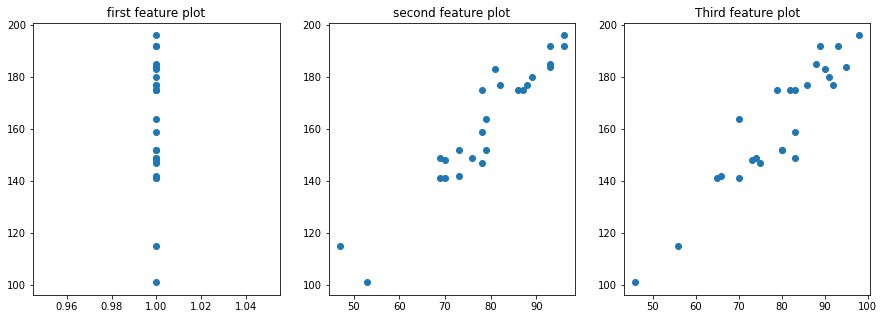

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(A[:,0],ylabel)
plt.title('first feature plot')
plt.subplot(1,3,2)
plt.scatter(A[:,1],ylabel)
plt.title('second feature plot')
plt.subplot(1,3,3)
plt.scatter(A[:,2],ylabel)
plt.title('Third feature plot')


#Objective fun

In [6]:
ypred=A@theta_vector


# 1.Minibatch adam

#initialize Hyperparameters


In [10]:
lr=0.0001
beta=0.9
eps=1e-8
n_iter=10000
batch_size=16

In [260]:
def modified_Adam(A,theta_vector,y_labels,lr,eps,beta,n_iter,b_size):
    
    #initialize first and second moment for each feature
    v=0.0
    error=[]
    m=0.0
    msqerror=0.0
    
    #data length and no of batches
    lendata=len(A) 
    n_batches=math.ceil(lendata/b_size)
    epochs=n_iter
    
    saved_y=np.zeros(len(A),) #save y_predit
    thetasAcc=[]
    temp_y= thetaAcc=np.zeros((n_iter,4))
    
    for i in range(0,epochs):#train n times
        j=0
        thetasAcc.append(theta_vector)
        
        for batch in range(0,n_batches):# loop on no of batches
            #compute the batch
            ABatch=A[j:j+b_size]
            ybatch=y_labels[j:j+b_size]
            
            #print('batch_size',len(ABatch))      
            
            #calc obj fn
            ypred=ABatch@theta_vector
            
            #compute error and gradient
            e=ypred - ybatch
            msqerror = (1/(2*b_size)) * (e.T@e)
            gradient = (1/b_size) * (ABatch.T@e)
                 
            #update moments
            m=m*beta+(1-beta)*gradient
            v=v*beta+(1-beta)*np.square(gradient)
                     
            #update weights
           
            theta_vector =theta_vector-(lr/(eps+np.sqrt(v))*m)
            #print('theta',theta_vector)
           
                             
            if (j+b_size)<=lendata: #check if not out of range,take the batch size
                j+=b_size
               
            else: #take the remaining data
                j+=lendata-j  
        #error of each epoch 
        error.append(msqerror[0]) #save error of the last batch at each epoch
        
        
        if gradient.all()<0.001: #check stopping conditon
                saved_y=ypred
                break
        
    return  thetasAcc,error,theta_vector

# call the function

In [266]:
weights,cost,theta_opt=modified_Adam(A,theta_vector,ylabel,0.01,eps,beta,300,batch_size)
weights

[array([[0.001],
        [0.001],
        [0.001],
        [0.001]]),
 array([[0.00839329],
        [0.00841383],
        [0.00843218],
        [0.00840614]]),
 array([[0.01917816],
        [0.01924339],
        [0.0193019 ],
        [0.01921892]]),
 array([[0.03206229],
        [0.03218425],
        [0.03229368],
        [0.03213851]]),
 array([[0.046421  ],
        [0.04660768],
        [0.04677516],
        [0.0465377 ]]),
 array([[0.06186932],
        [0.06212648],
        [0.06235715],
        [0.06203014]]),
 array([[0.07814469],
        [0.07847665],
        [0.07877434],
        [0.07835236]]),
 array([[0.09505782],
        [0.09546788],
        [0.09583551],
        [0.09531446]]),
 array([[0.11246748],
        [0.11295817],
        [0.11339801],
        [0.11277472]]),
 array([[0.1302658 ],
        [0.13083909],
        [0.13135291],
        [0.13062495]]),
 array([[0.148369  ],
        [0.14902645],
        [0.14961562],
        [0.1487811 ]]),
 array([[0.16671121],
        

# Plot the results

Text(0, 0.5, 'loss')

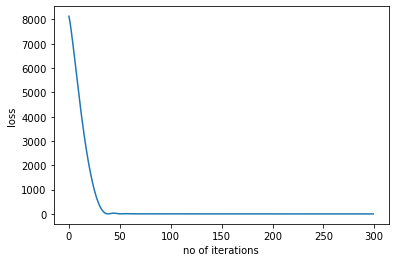

In [271]:
rang=np.arange(0,300,1)
plt.plot(rang,cost)
plt.xlabel("no of iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

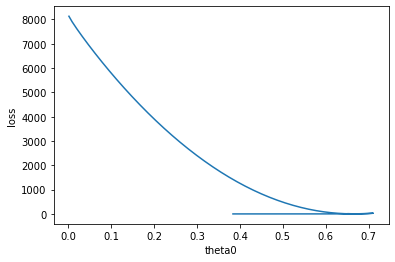

In [267]:
#plot error with theta0,theta1......
w1=np.array(weights)
theta0=w1[:,0]
theta1=w1[:,1]
theta2=w1[:,2]
theta3=w1[:,3]

plt.plot(theta0,cost)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

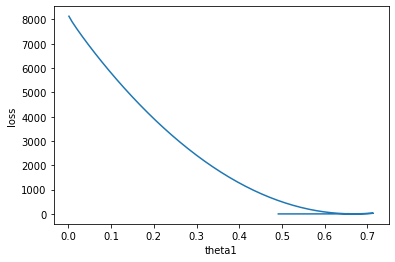

In [268]:
plt.plot(theta1,cost)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

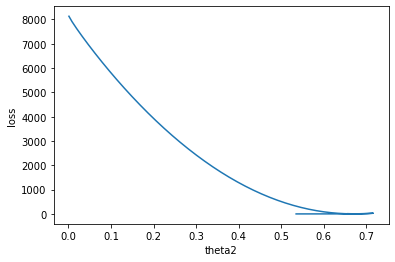

In [269]:
plt.plot(theta2,cost)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

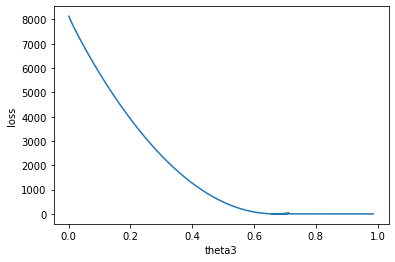

In [270]:
plt.plot(theta3,cost)
plt.xlabel("theta3")
plt.ylabel("loss")

# compute r2_score

In [10]:
#compute r2_score
yp=A@theta_opt
r2_score(ylabel,yp)

0.9891764274551254

# 2.batch adam

In [185]:
def adam(A,y_labels,theta_vector,lr,eps,beta,itera):
    
    s=len(A)
    error=[]
    m=v=0
    
    saved_y=np.zeros(len(A),) #save y_predit
    #thetasAcc=[]
    temp_y=np.zeros((itera,4))
    thetasAcc=[]
    
   
    
    for i in range(0,itera):#train n times
           
        #calc obj fn
            ypred=A@theta_vector
            
            #compute error and gradient
            e=ypred - y_labels
            msqerror = (1/(2*s)) * (e.T@e)
            gradient = (1/s) * (A.T@e)
                 
            #update moments
            m=m*beta+(1-beta)*gradient
            v=v*beta+(1-beta)*np.square(gradient)
                     
            #update weights
            thetasAcc.append(theta_vector)
            theta_vector =theta_vector-(lr/(eps+np.sqrt(v))*m)
           
                   
            #append error of each epoch   
            error.append(msqerror[0])
            
            if gradient.all()<0.001: #check stopping conditon
                saved_y=ypred
                break
                
            if i==itera-1:#take yopt
                saved_y=ypred
                
            
    return thetasAcc,error,saved_y

In [203]:
weights2,cost2,ypred=adam(A,ylabel,theta_vector,0.01,eps,0.9,100)
weights2

[array([[0.0001],
        [0.0001],
        [0.0001],
        [0.0001]]),
 array([[0.00326228],
        [0.00326228],
        [0.00326228],
        [0.00326228]]),
 array([[0.00762116],
        [0.00762116],
        [0.00762116],
        [0.00762116]]),
 array([[0.01282687],
        [0.01282687],
        [0.01282687],
        [0.01282687]]),
 array([[0.01869102],
        [0.01869102],
        [0.01869102],
        [0.01869102]]),
 array([[0.02508999],
        [0.02508999],
        [0.02508999],
        [0.02508999]]),
 array([[0.03193453],
        [0.03193453],
        [0.03193453],
        [0.03193453]]),
 array([[0.03915644],
        [0.03915644],
        [0.03915644],
        [0.03915644]]),
 array([[0.04670165],
        [0.04670165],
        [0.04670165],
        [0.04670166]]),
 array([[0.05452618],
        [0.05452618],
        [0.05452618],
        [0.05452619]]),
 array([[0.06259354],
        [0.06259354],
        [0.06259354],
        [0.06259356]]),
 array([[0.07087305],
    

# plot the results

Text(0, 0.5, 'loss')

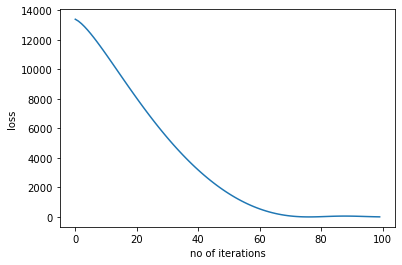

In [205]:
#plot error with no of epochs
rang=np.arange(0,100,1)
plt.plot(rang,cost2)
plt.xlabel("no of iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

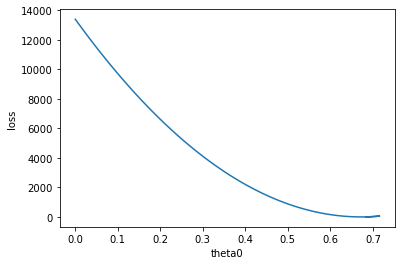

In [207]:
#plot error with theta0,theta1......
w=np.array(weights2)
theta0=w[:,0]
theta1=w[:,1]
theta2=w[:,2]
theta3=w[:,3]

plt.plot(theta0,cost2)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

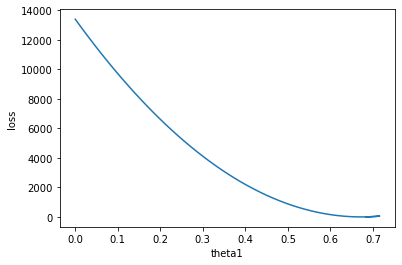

In [208]:
plt.plot(theta1,cost2)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

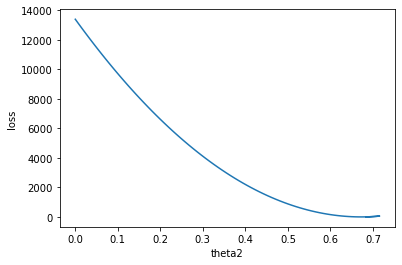

In [209]:
plt.plot(theta2,cost2)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

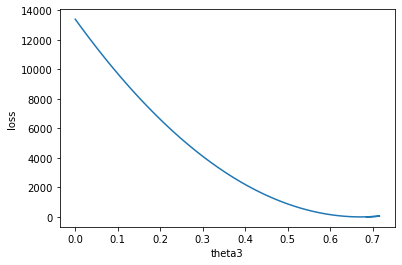

In [210]:
plt.plot(theta3,cost2)
plt.xlabel("theta3")
plt.ylabel("loss")

# compute r2 score

In [37]:
#compute r2_score
yp=A@weights2[-1] #opt weights
r2_score(ylabel,yp)

0.9896615787730083